<a href="https://colab.research.google.com/github/anacarolinamartins07/Projects_Machine_Learning_Supervised/blob/main/ML3_%C3%81rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prevendo se um cliente é churn ou não *(Machine learning supervisionado)*, com algoritmo para classificação (Árvore de Decisão).

# **1. Introdução**
Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.

"Seus clientes mais insatisfeitos são sua maior fonte de aprendizado (Bill Gates)."

A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.

Mas quais são as características que leva um cliente a dar o Churn?

Uma das maneiras que podemos diminuir o Churn é prever quais clientes têm mais risco de evasão. Assim, conseguimos tomar medidas preventivas.

Modelos de Machine Learning são técnicas poderosa para esse fim, ao utilizar essa ferramenta, você poderá descobrir com facilidade aqueles clientes que têm um risco maior de Churn.

Nesse artigo iremos fazer uma  análise do conjunto de dados de uma agência bancária.

Iremos mostrar o passo a passo da implementação de modelos de Machine Learning para prever o Churn.

#### Coleta e análise de dados

In [135]:
import pandas as pd

In [136]:
df= pd.read_csv("/content/Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [137]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

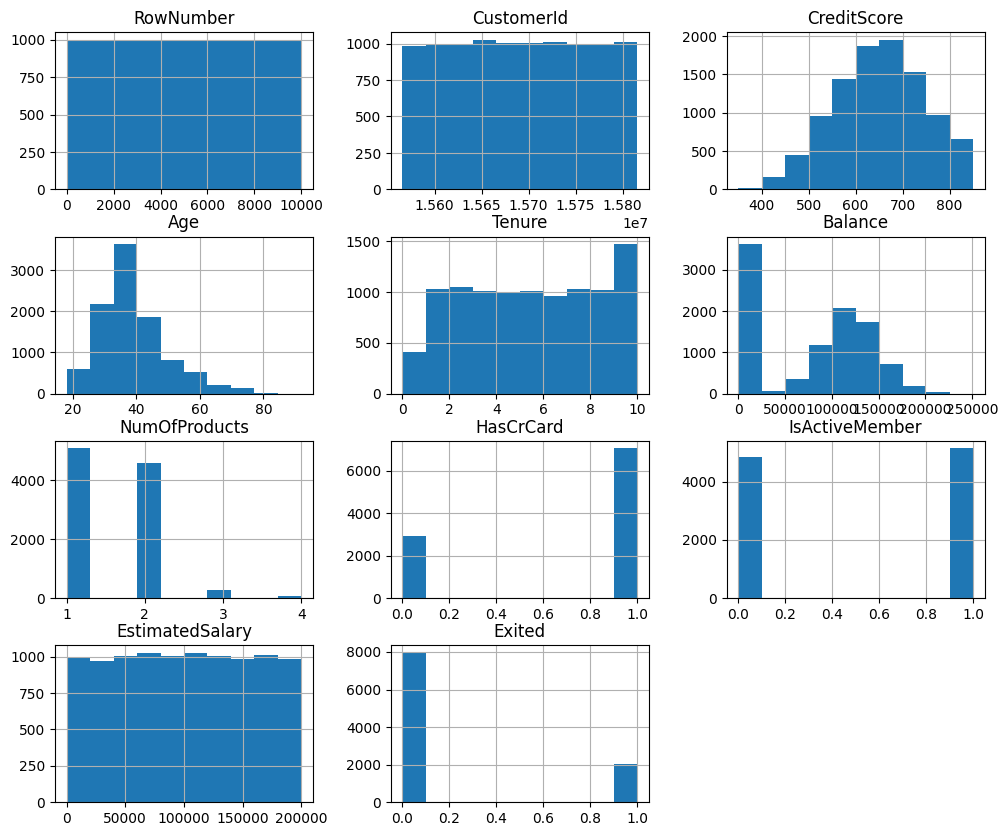

In [138]:
df.hist(figsize =(12,10))

In [139]:
df['Exited_cat'] = df['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']

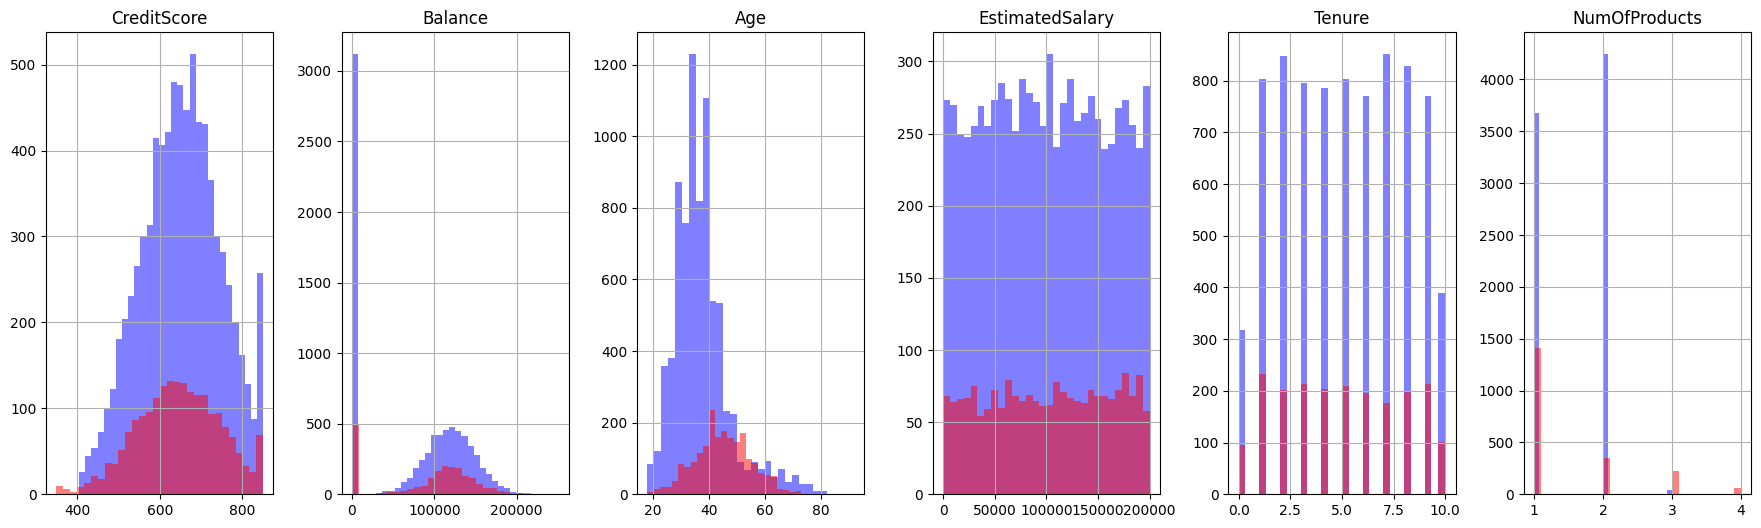

In [140]:
import matplotlib.pyplot as plt#visualização de dados;
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
df[df.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

### Pré-processamento

In [141]:
df = df.drop(columns = ["RowNumber",	"CustomerId",	"Surname", "Exited_cat"])# drop para deletar colunas

In [142]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:
df["Gender"] = df["Gender"].map({"Female":1, "Male":0}) #algoritmos de machine learning não aceitam letras apenas numeros, então temos que mudar

In [144]:
df1 = pd.get_dummies(data = df, columns= ["Geography"]) #transformando variavels em numeros binarios 0 e 1
#ou
#from sklearn.preprocessing import OneHotEncoder
#encoder= OneHotEncoder()
#one_hot_encoded_data = encoder.fit_transform(df[["Geography"]])


### Algoritmo e validação

In [145]:
#hol out (validação)
from sklearn.model_selection import train_test_split

In [146]:
x= df1.iloc[:,:-4]
y = df1.iloc[:, -4]

In [147]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [148]:
xtreino, xteste, ytreino, yteste = train_test_split(x, y , test_size = 0.25 , random_state = 40)

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [150]:
arvore = DecisionTreeClassifier (max_depth = 6)

In [151]:
arvore.fit(xtreino, ytreino)

DecisionTreeClassifier(max_depth=6)

In [152]:
y_predito = arvore.predict(xteste)

In [153]:
## Avaliação
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(yteste, y_predito)
matriz_confusao
#[VN, FP] [ FN, VP]

array([[1921,   90],
       [ 250,  239]])

In [154]:
acuracia = (1921+239)/ (1921+90+250+239)
acuracia

0.864

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
acc = accuracy_score(yteste, y_predito)
acc

0.864

In [157]:
sensibilidade = 239 / (250+  239)
sensibilidade

0.4887525562372188

In [158]:
from sklearn.metrics import recall_score

recall = recall_score(yteste, y_predito)
recall

0.4887525562372188

In [159]:
especificidade = 1921 / (1921+90)
especificidade

0.9552461461959224

In [160]:
precisao = 239 / (239+90)
precisao

0.7264437689969605

In [161]:
from sklearn.metrics import precision_score

precision = precision_score(yteste, y_predito)
precision

0.7264437689969605

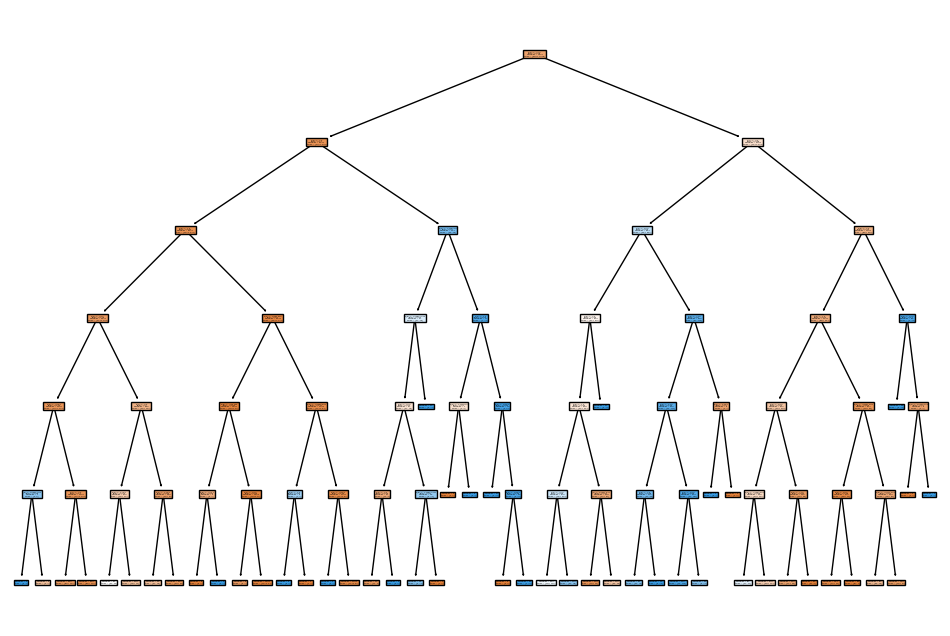

In [162]:
##visualizacao da arvore de decisao
# Plotar uma parte específica da árvore de decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(arvore, filled = True, max_depth = 6)  # Defina max_depth para limitar a profundidade da árvore exibida
plt.show()

In [163]:
# Exportando a arvore como texto
texto = tree.export_text(arvore)
print(texto)

|--- feature_2 <= 42.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_2 <= 38.50
|   |   |   |   |--- feature_0 <= 415.00
|   |   |   |   |   |--- feature_8 <= 95635.79
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  95635.79
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  415.00
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  38.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_0 <= 573.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  573.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_0 <= 543.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  543.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_5

In [164]:
# Hold Out
from sklearn.model_selection import train_test_split

In [165]:
X = df1.iloc[:,:-4]
X.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,42,2,0.0,1,1,1,101348.88


In [166]:
#X = df1.drop(columns = ["Exited"])
#y = df1["Exited"]

In [167]:
X_treino, X_teste , y_treino, y_teste = train_test_split (X,y, test_size = 0.25, random_state = 40)

###Ajuste de Modelo

In [168]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [169]:
arvore = DecisionTreeClassifier(max_depth = 6)

In [170]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=6)

In [171]:
y_pred = arvore.predict(X_teste)

###Avaliando o modelo de arvore


In [172]:
#Matriz de confusão

from sklearn.metrics import confusion_matrix

In [173]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

In [174]:
print(matriz_confusao)

# [VF,FP ][FN, VP]

[[1922   89]
 [ 251  238]]


In [175]:
acuracia = (1922+238)/ (1922+238+89+251)
acuracia

0.864

In [176]:
##Acuracia

from sklearn.metrics import accuracy_score

In [177]:
acc = accuracy_score(y_teste, y_pred)

print(acc)

0.864


In [178]:
recall = (238)/ (251+238)
recall

0.4867075664621677

In [179]:
especificidade = (1922)/(1922+89)
especificidade

0.95574341123819

In [180]:
from sklearn.metrics import recall_score

In [181]:
recall = recall_score(y_teste, y_pred)
recall

0.4867075664621677

In [182]:
from sklearn.metrics import precision_score

In [183]:
precision = precision_score(y_teste, y_pred)
precision

0.72782874617737

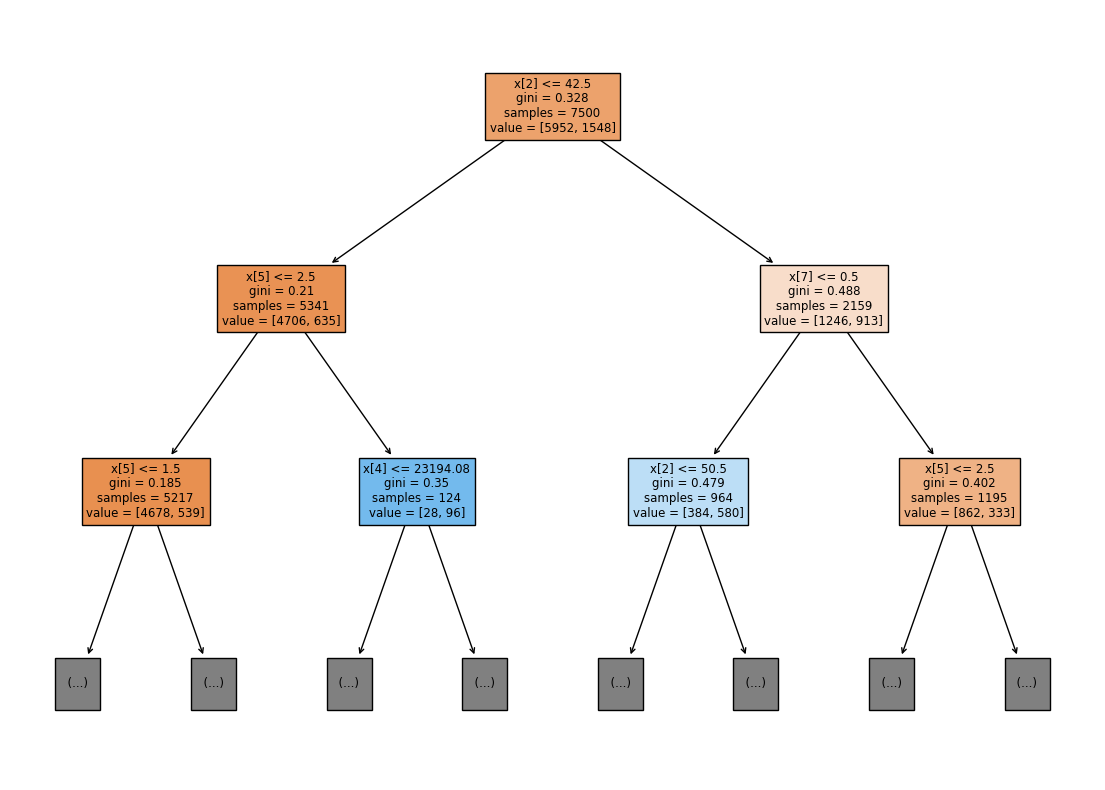

In [184]:
# Plotar uma parte específica da árvore de decisão
plt.figure(figsize=(14, 10))
tree.plot_tree(arvore, filled = True, max_depth = 2)  # Defina max_depth para limitar a profundidade da árvore exibida
plt.show()

In [185]:
# Exportando a arvore como texto
texto = tree.export_text(arvore)
print(texto)

|--- feature_2 <= 42.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_2 <= 38.50
|   |   |   |   |--- feature_0 <= 415.00
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  415.00
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  38.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_0 <= 573.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  573.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_0 <= 543.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  543.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_5 >  1.50